**<font size='5' color='red'>ch01. NLTK 자연어 처리 패키지</font>**

# 1. NLTK 패키지
1. 텍스트 전처리 : 토큰화(어절, 문장 나누기), 정규표현식을 활용한 토큰화, 불용어제거, 기본형(어근)추출
2. 품사태깅 : 단어 품사식별
3. 구조화된 문서의 빈도수, 분류분석, 연관분석, 감성분석 등 (단점:NLTK 속도가 느림)

In [2]:
import nltk

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
nltk.download('omw-1.4')
# c:/nltk_data
# d:/nltk_data
# e:/nltk_data
# c:/Users/내컴퓨터이름/nltk_data
# c:/Users/내컴퓨터이름/anaconda3/nltk_data
# c:/Users/내컴퓨터이름/anaconda3/share/nltk_data
# c:/Users/내컴퓨터이름/anaconda3/lib/nltk_data
# c:/Users/내컴퓨터이름/Appdata/Roaming/nltk_data
# 설치 경로 확인 필요

[nltk_data] Downloading package omw-1.4 to d:\nltk_data...


True

In [5]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [6]:
# 말뭉치 리스트
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [8]:
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma[:40])

[Emma by Jane Austen 1816]

VOLUME I

CH


In [9]:
len(emma)

887071

In [14]:
# sent_tokenize() :  문장단위로 쪼갠 list 반환
from nltk.tokenize import sent_tokenize
sent_tokens = sent_tokenize(emma)
print('첫 문장 : %r ' % (sent_tokens[0]))
print('두 번째 문장 : %r ' % (sent_tokens[1]))
print('문장 수 : ', len(sent_tokens))

첫 문장 : '[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.' 
두 번째 문장 : "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period." 
문장 수 :  7456


In [16]:
# word_tokenize() : 단어단위로 쪼갠 list 반환
from nltk.tokenize import word_tokenize
print(word_tokenize(sent_tokens[0]))

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']


In [17]:
# RegexpTokenizer클래스 : 토큰화 시 정규표현식 이용
# 단어 외 구분기호 제외
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer('\w+')  # \w:a-A, +:1글자이상, [\w]{3}:3글자이상
words = ret.tokenize(sent_tokens[0])
print(words)

['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her']


# 2. 형태소(의미있는 가장 작은 말의 단위) 분석
 - 자연어처리의 기본은 형태소 분석과 품사태깅
     * 어간추출(stemming), 원형복원(lemmatizing), 품사태깅

In [20]:
words = ['sending', 'cooking', 'files', 'lives', 'crying', 'dying']
# 1. 어간 추출 방법-1 : PorterStemmer
from nltk.stem import  : PorterStemmer
pst = PorterStemmer()  # 객체 생성
pst.stem(words[0]), pst.stem(words[1]), pst.stem(words[2]), pst.stem(words[3]), pst.stem(words[4]), pst.stem(words[5])

('send', 'cook', 'file', 'live', 'cri', 'die')

In [21]:
[pst.stem(word) for word in words]  # 리스트 컴프리헨션

['send', 'cook', 'file', 'live', 'cri', 'die']

In [23]:
# 1. 어간 추출 방법-2 ※ : LancasterStemmer
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()  # 객체 생성
[lst.stem(word) for word in words]

['send', 'cook', 'fil', 'liv', 'cry', 'dying']

In [25]:
# 1. 어간 추출 방법-3 : RegexpStemmer(정규표현식)
from nltk.stem import RegexpStemmer
rst = RegexpStemmer('ing')  # (정규표현식) : 정규표현식을 제외하여 추출
[rst.stem(word) for word in words]

['send', 'cook', 'files', 'lives', 'cry', 'dy']

In [26]:
# 어간을 추출할 경우 의미가 달라지는 경우가 있어 원형복원을 하기도 함
words2 = ['believes', 'cooking']  # belives
[lst.stem(word) for word in words2]

['believ', 'cook']

In [28]:
# 2. 원형 복원
from nltk.stem.wordnet import WordNetLemmatizer
wl = WordNetLemmatizer()
[wl.lemmatize(word) for word in words2]

['belief', 'cooking']

In [34]:
# 3. 품사태깅 : sent_tokens[10]
from nltk.tag import pos_tag
words = word_tokenize(sent_tokens[10])
tagged_list = pos_tag(words)
print('단어들 : ', words)
print('품사태깅 결과 : ', tagged_list)

단어들 :  ['It', 'was', 'on', 'the', 'wedding-day', 'of', 'this', 'beloved', 'friend', 'that', 'Emma', 'first', 'sat', 'in', 'mournful', 'thought', 'of', 'any', 'continuance', '.']
품사태깅 결과 :  [('It', 'PRP'), ('was', 'VBD'), ('on', 'IN'), ('the', 'DT'), ('wedding-day', 'NN'), ('of', 'IN'), ('this', 'DT'), ('beloved', 'VBN'), ('friend', 'NN'), ('that', 'WDT'), ('Emma', 'NNP'), ('first', 'RB'), ('sat', 'VBD'), ('in', 'IN'), ('mournful', 'JJ'), ('thought', 'NN'), ('of', 'IN'), ('any', 'DT'), ('continuance', 'NN'), ('.', '.')]


퀴즈 : emma 소설안에서
1. 특수문자가 들어가지 않은 3글자 이상의 단어만 추출해 품사태깅을 하시오. (RegexpTokenizer)
    * emma의 글자수, 단어 출현수, 단어종류, 품사태깅한 데이터 초반 10개 출력
2. 'Emma' 단어가 몇 번 등장하며, 품사 태깅이 어떤 품사들로 되어 있는지 모두 출력하시오. (NNP, ...)
    * Emma 단어 출현 횟수, 분류된 품사들 NNP, NNPS, ...
3. 원하는 품사(명사:NN, NNS, NNP, NNPS)의 단어만 뽑아 등장하는 명사의 종류 갯수를 출력하시오.
    * 명사가 나온 횟수, 출현한 명사의 갯수(반복제거), 한 단어가 나오는 평균 빈도수

In [120]:
# 1. 특수문자가 들어가지 않은 3글자 이상의 단어만 추출해 품사태깅을 하시오. (RegexpTokenizer)
# emma의 글자수, 단어 출현수, 단어종류, 품사태깅한 데이터 초반 10개 출력
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
ret = RegexpTokenizer('[\w]{3,}')  # \w:a-A, +:1글자이상, [\w]{3,}:3글자이상
words = ret.tokenize(emma)
tagged_list = pos_tag(words)
print('emma의 글자수 : ', len(emma))
print('단어 출현수 : ', len(words))
print('단어종류 : ', set(tagged_list))
print('품사태깅 : ', tagged_list[:10])

emma의 글자수 :  887071
단어 출현수 :  123877
단어종류 :  {('hundred', 'CD'), ('marks', 'NNS'), ('ours', 'NNS'), ('guarded', 'VBN'), ('unbidden', 'JJ'), ('slyness', 'NN'), ('Yes', 'NNP'), ('sort', 'VB'), ('indebted', 'JJ'), ('mortals', 'NNS'), ('progress', 'JJ'), ('furnished', 'VBN'), ('precautions', 'NNS'), ('above', 'JJ'), ('refine', 'VB'), ('betrayed', 'VBD'), ('sole', 'NN'), ('such', 'PDT'), ('implied', 'VBN'), ('VOLUME', 'NNP'), ('confidence', 'NN'), ('very', 'JJ'), ('attention', 'NN'), ('seminary', 'JJ'), ('dropped', 'VBD'), ('essential', 'NN'), ('hesitatingly', 'RB'), ('precise', 'NN'), ('fresh', 'JJ'), ('told', 'VBN'), ('foretell', 'VB'), ('sufficient', 'JJ'), ('irresistible', 'JJ'), ('submitted', 'VBN'), ('forced', 'JJ'), ('bountiful', 'JJ'), ('broadly', 'RB'), ('Poor', 'NNP'), ('tea', 'IN'), ('adapt', 'VB'), ('arrow', 'NN'), ('widow', 'NN'), ('defence', 'NN'), ('collection', 'NN'), ('boil', 'NN'), ('gown', 'NN'), ('entreaties', 'NNS'), ('restoration', 'NN'), ('promote', 'IN'), ('openly', 

In [91]:
# 2. 'Emma' 단어가 몇 번 등장하며, 품사 태깅이 어떤 품사들로 되어 있는지 모두 출력하시오. (NNP, ...)
# Emma 단어 출현 횟수, 분류된 품사들 NNP, NNPS, ...
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
words = word_tokenize(emma)
tagged_list = pos_tag(words)
emma_count = words.count('Emma')
emma_tagged_list = [tag for word, tag in tagged_list if word == 'Emma']
print('Emma 단어 출현 횟수 : ', emma_count)
print('분류된 품사 태깅 : ', set(emma_tagged_list))

Emma 단어 출현 횟수 :  855
분류된 품사 태깅 :  {'NNS', 'VB', 'NN', 'NNP', 'NNPS', 'FW'}


In [112]:
# 3. 원하는 품사(명사:NN, NNS, NNP, NNPS)의 단어만 뽑아 등장하는 명사의 종류 갯수를 출력하시오.
# 명사가 나온 횟수:30781, 출현한 명사의 갯수(반복제거):4165, 한 단어가 나오는 평균 빈도수:7.39
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
words = word_tokenize(emma)
tagged_list = pos_tag(words)
noun = [word for word, tag in tagged_list if tag in ['NN', 'NNS', 'NNP', 'NNPS']]
noun = [word for word, tag in tagged_list if tag=='NN' or tag=='NNS' or tag=='NNP' or tag=='NNPS']
print('명사가 나온 횟수 : ', len(noun))
print('출현한 명사의 갯수 : ', len(set(noun)))
print('한 단어가 나오는 평균 빈도수 : ', (len(noun) /len(set(noun))))

명사가 나온 횟수 :  32048
출현한 명사의 갯수 :  4489
한 단어가 나오는 평균 빈도수 :  7.139229226999332


In [116]:
count = 0
dan = set()
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
words = ret.tokenize(emma)
tagged_list = pos_tag(words)

for x, m in tagged_list:
    if m == 'NN' or m =='NNS' or m =='NNP' or m =='NNPS':
        count += 1
        dan.add(x)
print('명사가 나온 횟수 :', count)
print('명사가 나온 수 (반복제거) :' , len(set(dan)))
print('한단어가 나오는 평균 빈도수 :', count/ len(set(dan)))

명사가 나온 횟수 : 30781
명사가 나온 수 (반복제거) : 4165
한단어가 나오는 평균 빈도수 : 7.3903961584633855


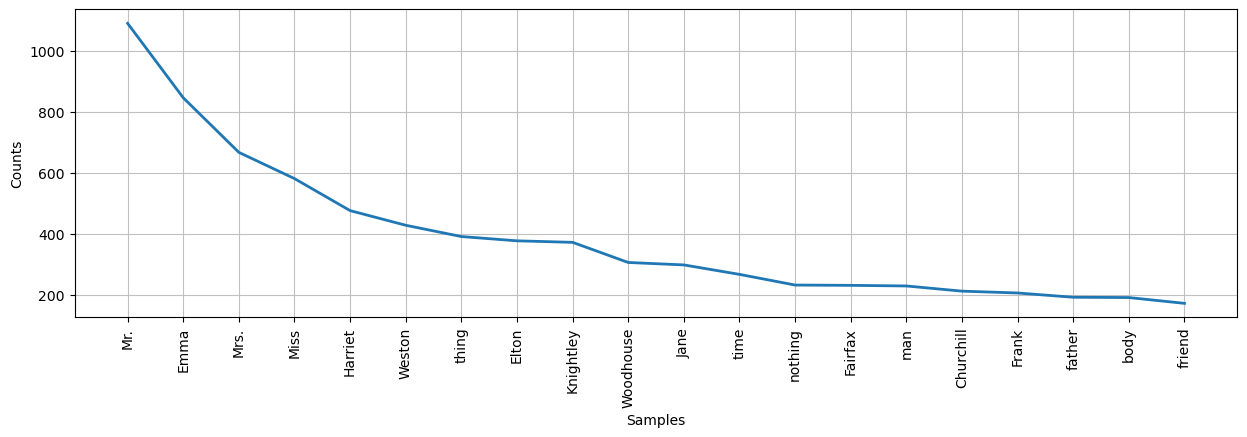

<Axes: xlabel='Samples', ylabel='Counts'>

In [121]:
# 명사들 중 최빈단어수
import matplotlib.pyplot as plt
from nltk import Text
# Text : 단어 리스트와 빈도 분석에서 사용될 클래스
emma_text = Text(noun)
plt.figure(figsize=(15, 4))
emma_text.plot(20)

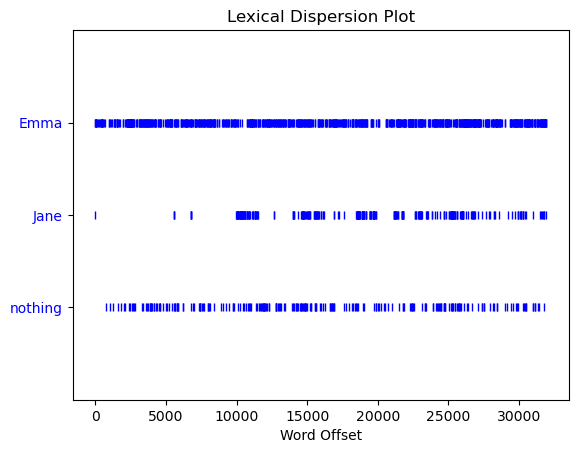

In [122]:
emma_text.dispersion_plot(['Emma', 'Jane', 'nothing'])

In [134]:
# 고유명사(이름) 출현 빈도 분석
name_list = [word for word, tagged_lst in tagged_list if tagged_lst in ['NNP', 'NNPS']]
# print(name_list[:5])

freq_dict = {}
for name in name_list:
    if name in freq_dict.keys():
        freq_dict[name] += 1
    else:
        freq_dict[name] = 1
# print(freq_dict)

In [135]:
from nltk import FreqDist
FreqDist(name_list)

FreqDist({'Emma': 840, 'Mrs': 696, 'Miss': 569, 'Harriet': 484, 'Weston': 433, 'Knightley': 389, 'Elton': 382, 'Jane': 295, 'Woodhouse': 293, 'Fairfax': 241, ...})

In [137]:
# 150번 이상 반복되는 이름들만 출력
for name, freq in FreqDist(name_list).items():
    if freq >= 150:
        print(name, '-', freq)

Emma - 840
Jane - 295
Woodhouse - 293
Miss - 569
Weston - 433
Mrs - 696
Hartfield - 155
Knightley - 389
Elton - 382
Churchill - 221
Frank - 208
Harriet - 484
Fairfax - 241


In [140]:
# 위의 내용을 정렬하여 출력
import pandas as pd
dic = dict(FreqDist(name_list))
# dic = freq_dict
wordcnt = pd.Series(dic)
wordcnt.sort_values(ascending=False, inplace=True)
wordcnt.head(13)

Emma         840
Mrs          696
Miss         569
Harriet      484
Weston       433
Knightley    389
Elton        382
Jane         295
Woodhouse    293
Fairfax      241
Churchill    221
Frank        208
Hartfield    155
dtype: int64

In [141]:
# 150번 이상 출현한 이름을 정렬해서 출력
wordcnt[wordcnt >= 150]

Emma         840
Mrs          696
Miss         569
Harriet      484
Weston       433
Knightley    389
Elton        382
Jane         295
Woodhouse    293
Fairfax      241
Churchill    221
Frank        208
Hartfield    155
dtype: int64